# Gradient Descent

---

## Lab Objective

To understand how a cost function can be minimized using gradient descent and apply it to linear regression models.  
  
The contents of this lab course:
1. Understanding the limitations of classical learning method
2. Visualizing the intuition behind gradient descent
3. Application of gradient descent to linear regression models

Let us start by importing all the required packages for this lab. 😁

In [15]:
import numpy as np
import pandas as pd
import visualize
import random
import matplotlib.pyplot as plt

## Understanding the limitations of classical learning method

Classical closed form learning methods for linear regression (E.g. Normal equation) are often both memory intensive and computationally intensive. During training, the normal equation ${(X^TX)}^{-1}X^TY$, requires the whole dataset to be loaded in memory and the computational complexity to compute the inverse of the matrix in the equation is $O(n^2)$.  
  
Gradient descent is a three step iterative algorithm that successively finds a better approximation for the coefficients of our linear model, $Y_{predict} = X \theta$.  
**Step 1**: Randomly sample a data point $(X_i, Y_i)$.  
**Step 2**: Calculate the gradient of the loss function $\nabla{L(X_i, Y_i, \theta_t)} = -2X_i(Y_i - X_i \theta)$.  
**Step 3**: Update the coefficients $\theta_{t+1} = \theta_t - \alpha \nabla{L(X_i, Y_i, \theta_t)}$.  
  
The iterative algorithm of gradient descent allows us to fine-tune an existing model efficiently, without requiring the $O(n^2)$ computational complexity of normal equation.

## Visualizing the intuition behind gradient descent

Before we start the visualization of the gradient descent process, define a function to accept a data sample vector $X_i \in R^{1 \times N} $, response data $Y_i \in R^1$, current coefficient vector $\theta_t \in R^{N}$, learning rate $\alpha \in R^1$ and return the updated coefficient vector $\theta_{t+1} \in R^{n}$.  
  
**Hint: See the [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) documentation to learn how to perform a dot product using numpy**

In [38]:
def gradient_descent(x_i, y_i, theta_t, alpha):
    gradient = 0 # Calculate the gradient of the loss function
    theta_t1 = 0 # Update the coefficients
    gradient = np.dot(-2*x_i, (y_i - np.dot(x_i,theta_t)))
    theta_t1 = theta_t - alpha * gradient
    return theta_t1


## Visualizing regression in 2 dimension

Load the dataset.

In [32]:
dataset_2d = pd.read_csv('dataset_2d.csv')

Checking the shape and dtype of the dataset.

In [18]:
dataset_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InputFeature      5 non-null      float64
 1   ResponseVariable  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


Initialize model parameters.

In [33]:
model_theta = np.zeros(1)

Initialize sampling parameters.

In [34]:
choices = list(range(len(dataset_2d)))
remaining_choices = choices.copy()

Re-run the code cell below multiple times to visualize the iterative process of gradient descent.

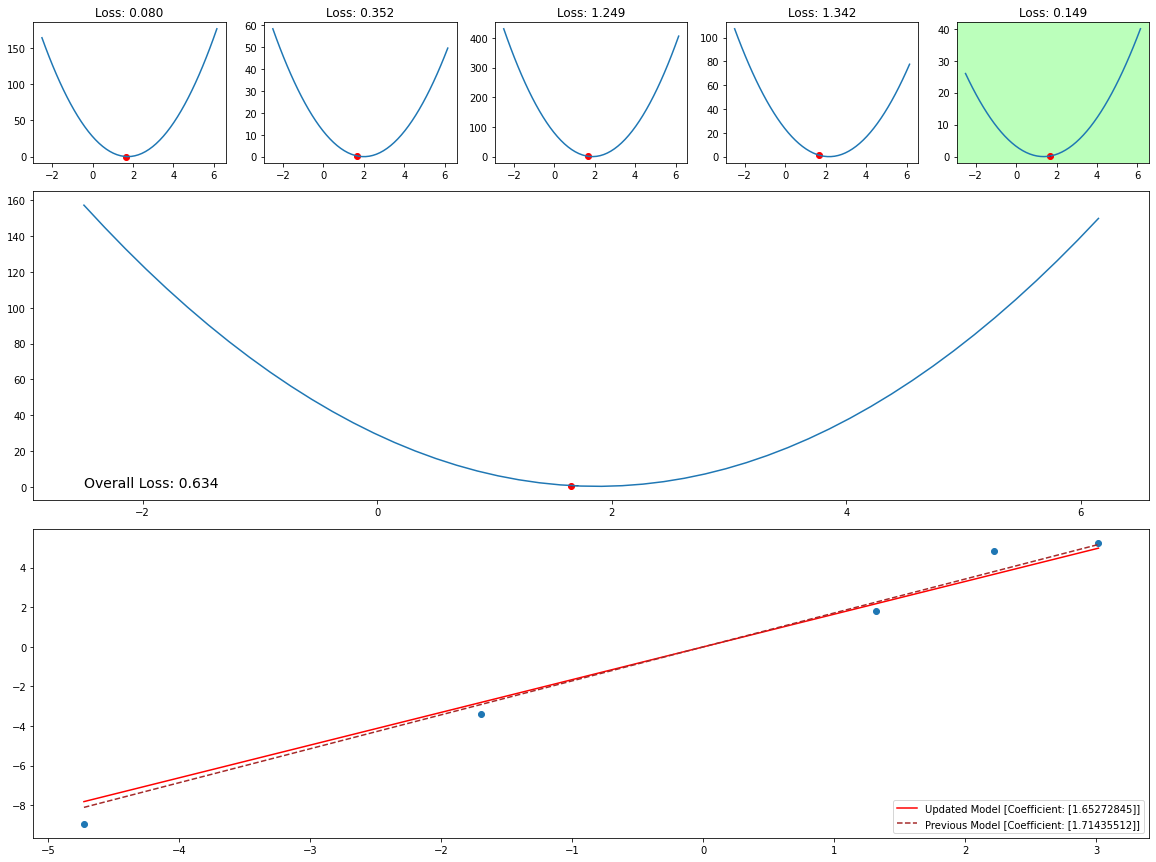

In [50]:
# Select a random data point
remaining_choices = remaining_choices if len(remaining_choices) > 0 else choices.copy()
selected_idx = random.choice(remaining_choices)
selected_sample = dataset_2d.loc[selected_idx]
remaining_choices.remove(selected_idx)

# Perform gradient descent on selected data point
previous_theta = model_theta
model_theta = gradient_descent(selected_sample.InputFeature, selected_sample.ResponseVariable, model_theta, 0.05)
figure = visualize.graph_sgd_2d(dataset_2d, selected_idx, model_theta, previous_theta)

# Visualize the updated model
plt.show()
plt.close(figure)

## Visualizing regression in 3 dimension

Load the dataset.

In [51]:
dataset_3d = pd.read_csv('dataset_3d.csv')

Checking the shape and dtype of the dataset.

In [52]:
dataset_3d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InputFeatureA     5 non-null      float64
 1   InputFeatureB     5 non-null      float64
 2   ResponseVariable  5 non-null      float64
dtypes: float64(3)
memory usage: 248.0 bytes


Initialize model parameters.

In [54]:
model_theta = np.zeros(2)

Initialize sampling parameters.

In [55]:
choices = list(range(len(dataset_3d)))
remaining_choices = choices.copy()

Re-run the code cell below multiple times to visualize the iterative process of gradient descent

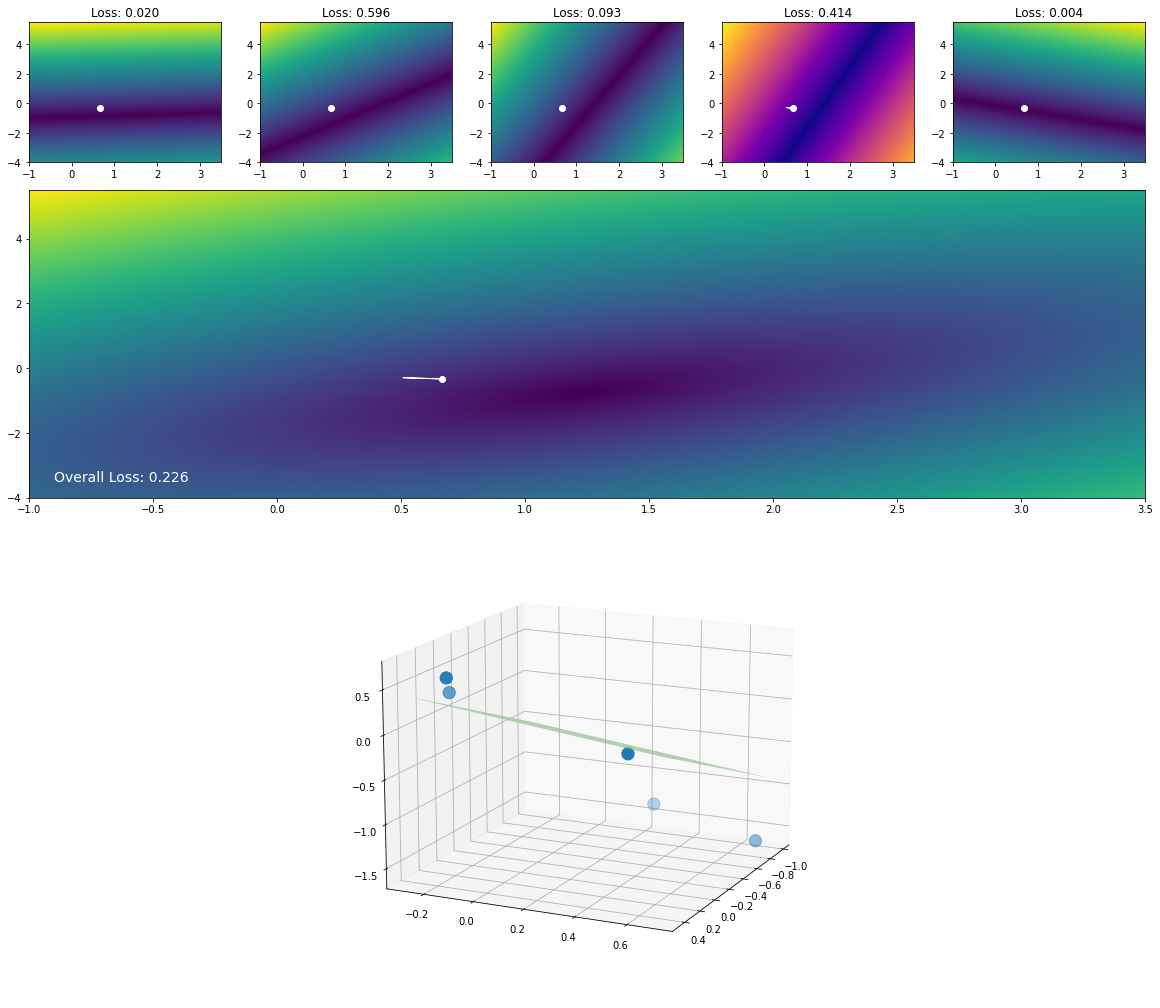

In [62]:
# Select a random data point
remaining_choices = remaining_choices if len(remaining_choices) > 0 else choices.copy()
selected_idx = random.choice(remaining_choices)
selected_sample = dataset_3d.loc[selected_idx]
remaining_choices.remove(selected_idx)

# Perform gradient descent on selected data point
previous_theta = model_theta
model_theta = gradient_descent(selected_sample[['InputFeatureA', 'InputFeatureB']], 
                               selected_sample.ResponseVariable, model_theta, 0.1)
figure = visualize.graph_sgd_3d(dataset_3d, selected_idx, model_theta, previous_theta)

# Visualize the updated model
plt.show()
plt.close(figure)

**Discussion Time: What are the advantages and disadvantages of gradient descent?**